<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Customise/DataPipeline/Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Datasets

In this reading notebook, we will take a look at the `tensorflow-datasets` library.

We have previously made use of the `tf.keras.datasets` package, which gave us access to a variety of useful datasets such as the IMDB movie dataset, the CIFAR-100 small image classification dataset, and the MNIST handwritten digits dataset.

The `tensorflow-datasets` library gives us another means of accessing a variety of useful datasets.

## Installation
The `tensorflow-datasets` library is installed independently of TensorFlow itself. It can be installed using pip, by running the following command in a terminal (assuming that `tensorflow` has already been installed):

```pip install tensorflow-datasets ```

In [2]:
%%bash
pip install --no-cache-dir -qU tensorflow-datasets

## Listing the Available Datasets
The `list_builders` function can be used to  list the available datasets.

In [3]:
import tensorflow_datasets as tfds

# List some available datasets
tfds.list_builders()[:5]

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']

## Loading a Dataset

Loading a particular dataset is straightforward; simply use the `load` function, specifying the `name` and any other keyword arguments. In the example code below, we demonstrate how to load the `kmnist` dataset using the function.

As stated on the documentation page, running the function with `split=None` (the default) returns a dictionary of the splits, with the keys `test` and `train`.

In [4]:
import tensorflow_datasets as tfds

# Load the mnist_corrupted dataset
kmnist  = tfds.load(name="kmnist", split=None)

kmnist_train = kmnist['train']
print(f"train dataset element spec: {kmnist_train.element_spec}")

kmnist_test = kmnist['test']
print(f"test dataset element spec: {kmnist_test.element_spec}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/3.0.1.incompleteR788S4/kmnist-train.tfrecord*...:   0%|          | …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/3.0.1.incompleteR788S4/kmnist-test.tfrecord*...:   0%|          | 0…

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.
train dataset element spec: {'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}
test dataset element spec: {'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}


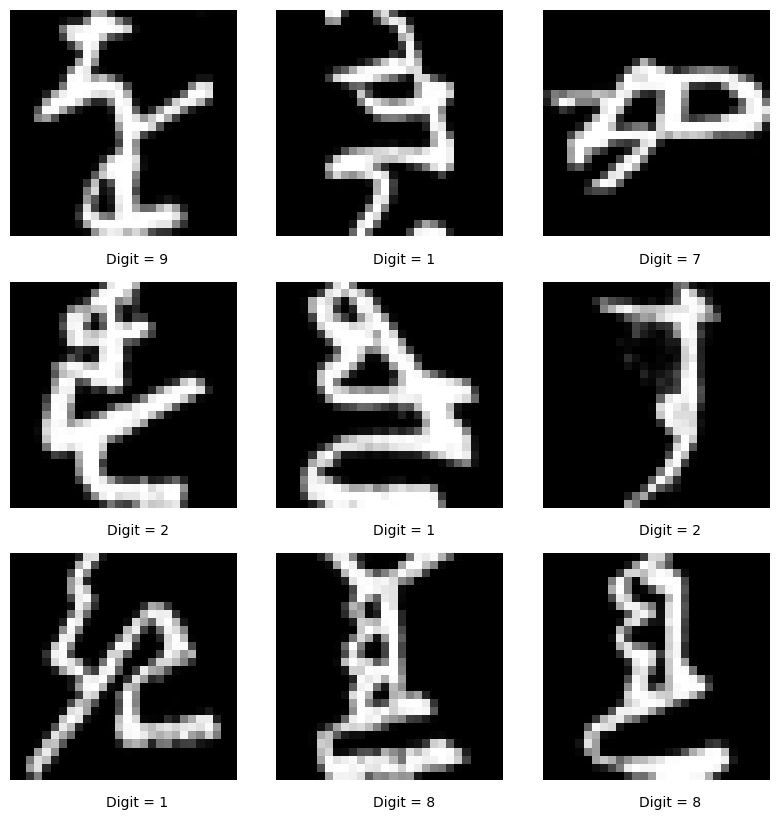

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# View some examples from the dataset
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for (elem, ax) in zip(kmnist_train, axes.flat):
    image = tf.squeeze(input=elem['image'])
    label = elem['label']
    ax.imshow(X=image, cmap='gray')
    ax.text(x=0.7, y=-0.12, s=f'Digit = {label}',
        ha='right', transform=ax.transAxes, color='black')
    ax.axis('off')
plt.show()

## Further reading and resources
* https://www.tensorflow.org/datasets
* https://www.tensorflow.org/datasets/catalog/overview
* https://wwww.tensorflow.org/datasets/api_docs/python/tfds
* https://tensorflow.org/datasets/api_docs/python/tfds/load